In [6]:
from pathlib import Path
from skimage.io import imread, imsave
from tnia.plotting.plt_helper import imshow_multi2d
from cellpose import models, io, utils
import os
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization 
import matplotlib.pyplot as plt

In [4]:
parent_path = r'D:\images\tnia-python-images\imagesc\2025_04_10_beans'
model_path = os.path.join(parent_path, 'models')
model_name = 'beans_again'
model = models.CellposeModel(gpu=True, model_type=None, pretrained_model= os.path.join(model_path, model_name))

In [5]:
print('diameter mean', model.diam_labels, model.diam_mean)

diameter mean 38.380768 30.0


D:\images\tnia-python-images\imagesc\2025_04_10_beans\Pic_1.jpg
D:\images\tnia-python-images\imagesc\2025_04_10_beans\Pic_2.jpg


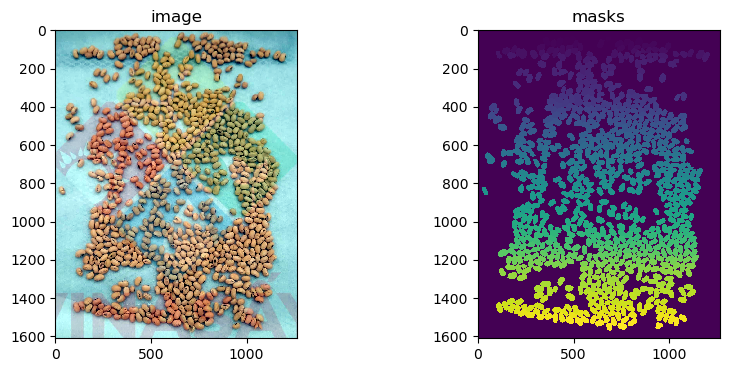

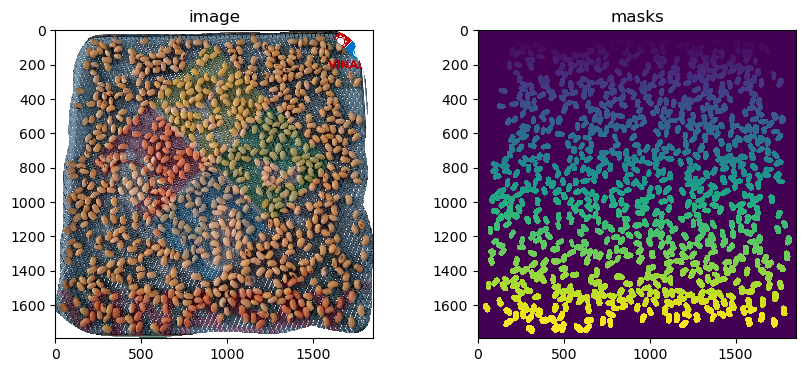

In [ ]:

files = Path(parent_path).glob('*.jpg')

for file in files:
    print(file)
    img = imread(file)
    img = quantile_normalization(img, channels=True).astype(np.float32)

    masks = model.eval(img, channels=[0, 0], diameter=30, cellprob_threshold=-2, flow_threshold = 0.4, normalize = False, niter=200)

    ims = [img, masks[0]]
    titles = ['image', 'masks']
    imshow_multi2d(ims, titles, 1, 2)
